In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

In [36]:
# 1. 데이터 준비

df = pd.read_csv('./data/student_data.csv', encoding='euc-kr')
# 학교명, 학년, 성별, 키, 몸무게
df = df[['학교명', '학년', '성별', '키', '몸무게']]
len(df)

9686

In [37]:
df.dropna(inplace=True)
len(df)
df

,학교명,학년,성별,키,몸무게
0,서울대도초등학교,1,남,125.8,27.3
1,서울대도초등학교,1,남,124.3,25.4
2,서울대도초등학교,1,남,119.2,23.5
3,서울대도초등학교,1,남,115.0,20.0
4,서울대도초등학교,1,남,120.0,33.5
...,...,...,...,...,...
9681,세종과학고등학교,3,남,176.1,50.4
9682,세종과학고등학교,3,남,174.1,88.8
9683,세종과학고등학교,3,남,169.5,63.2
9684,세종과학고등학교,3,여,159.2,52.9


In [38]:
df['grade'] = list(map(lambda x: 0 if x[-4:] == '초등학교' else 6 if x[-3:] == '중학교' else 9, df['학교명'])) + df['학년']
# df['grade'] = [0 + j if '초등학교' in i else 6 + j if '중학교' in i else 9 + j for i, j in zip(df['학교명'], df['학년'])]
df

,학교명,학년,성별,키,몸무게,grade
0,서울대도초등학교,1,남,125.8,27.3,1
1,서울대도초등학교,1,남,124.3,25.4,1
2,서울대도초등학교,1,남,119.2,23.5,1
3,서울대도초등학교,1,남,115.0,20.0,1
4,서울대도초등학교,1,남,120.0,33.5,1
...,...,...,...,...,...,...
9681,세종과학고등학교,3,남,176.1,50.4,12
9682,세종과학고등학교,3,남,174.1,88.8,12
9683,세종과학고등학교,3,남,169.5,63.2,12
9684,세종과학고등학교,3,여,159.2,52.9,12


In [39]:
df.drop(['학교명', '학년'], axis=1, inplace=True)

In [40]:
df.columns = ['gender', 'height', 'weight', 'grade']
df

,gender,height,weight,grade
0,남,125.8,27.3,1
1,남,124.3,25.4,1
2,남,119.2,23.5,1
3,남,115.0,20.0,1
4,남,120.0,33.5,1
...,...,...,...,...
9681,남,176.1,50.4,12
9682,남,174.1,88.8,12
9683,남,169.5,63.2,12
9684,여,159.2,52.9,12


In [41]:
df['gender'] = df['gender'].map({'남' : 0, '여' : 1})

In [43]:
is_boy = df['gender'] == 0
boy_df, girl_df = df[is_boy], df[~is_boy]

In [44]:
X = boy_df['weight']
y = boy_df['height']

In [45]:
# 2. 분할
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state=1)

In [46]:
# 3. 준비 (모델)
linear = LinearRegression()

In [47]:
# 4. 학습
linear.fit(train_X.values.reshape(-1,1), train_y)

LinearRegression()

In [60]:
# 5. 예측

predict = linear.predict(test_X.values.reshape(-1,1))
test_X, predict

(4289    42.0
 9577    55.1
 639     41.4
 7826    74.5
 8532    69.0
         ... 
 1101    36.1
 5101    59.0
 9096    56.8
 811     30.6
 8001    91.2
 Name: weight, Length: 993, dtype: float64,
 array([148.28971894, 159.16114343, 147.7917911 , 175.26081023,
        170.6964717 , 156.17357639, 139.99092162, 169.45165211,
        144.14032028, 162.31468641, 172.35623117, 157.66735991,
        166.79603696, 151.60923787, 163.47651803, 164.14042182,
        162.48066236, 170.77945968, 134.59670336, 173.35208685,
        137.41829445, 135.26060714, 179.74216078, 182.89570376,
        155.34369666, 147.45983921, 158.58022762, 165.1362775 ,
        158.66321559, 160.98687884, 140.6548254 , 173.1861109 ,
        177.8334374 , 162.81261425, 151.77521381, 167.62591669,
        182.14881201, 157.0864441 , 158.91217951, 133.60084768,
        156.09058842, 137.83323431, 164.63834966, 163.55950601,
        155.09473274, 152.68808152, 162.39767438, 164.47237371,
        172.19025522, 152.10716571

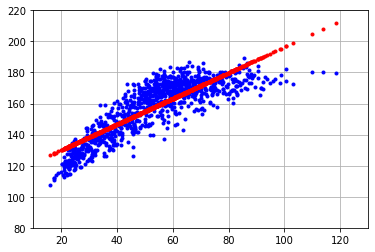

In [59]:
import matplotlib.pyplot as plt

plt.plot(test_X, test_y, 'b.')
plt.plot(test_X, predict, 'r.')
plt.xlim(10, 130)
plt.ylim(80, 220)
plt.grid()

In [50]:
linear.predict([[50]])

array([154.92875679])